# Multi-dimensional Scaling (MDS)

Author: Matt Smart

[Overview](#linkOverview)  
[Details](#linkDetails)  
[Algorithm](#linkAlgorithm)  
[Example 1: MNIST](#linkExample1)  
[Example 2: Reconstruct city positions from distances](#linkExample2)  
[Resources](#linkResources)  

### Overview <a id='linkOverview'></a>
- Non-linear dimension reduction technique  
- Rough idea - given high dimensional data $X$, find a lower dimensional representation $Y$ such that the global distance structure is preserved
- Two subtypes of MDS: metric (quantitative) and non-metric (qualitative)
- Common "first resort" technique, like PCA

### Details <a id='linkDetails'></a>

#### Metric MDS
Setup:
- Suppose one has $p$ samples of N-dimensional data points, $x_i\in\mathbb{R}^N$
- Store these samples columnwise as $X\in\mathbb{R}^{N\,\times\,p}$
- We call this the original data matrix, or simply the data
- Assumption: there is a meaningful metric (e.g. Euclidean distance) on the data space (high dim)
- Assumption: there is a meaningful metric (e.g. Euclidean distance) on the latent space (low dim)

Goal:
- Given N-dim data $X$, a metric $d(\cdot,\cdot)$ on $\mathbb{R}^N$, a target dimension $k<N$, and a metric $g(\cdot,\cdot)$ on $\mathbb{R}^k$
- FInd an embedding $Y\in\mathbb{R}^{k\,\times\,p}$ (i.e. a $y_i\in\mathbb{R}^k$ for each $x_i\in\mathbb{R}^N$) such that distances $d_{ij}$, $g_{ij}$ are preserved between representations

Objective function: $$Y^\ast=\operatorname*{arg\,min}_Y {\sum_{i<j}{w_{ij}\left|d_{ij}\left(X\right)-g_{ij}\left(Y\right)\right|}}$$

Notes:
- Define the ''stress'':  $f(W,X,Y)\equiv{\sum_{i<j}{w_{ij}\left|d_{ij}\left(X\right)-g_{ij}\left(Y\right)\right|}}$, then  $Y^\ast=\operatorname*{arg\,min}_Y f(W,X,Y)$
- Use the free weights $w_{ij}\geq 0$ to specify the confidence (or precision) of $d_{ij}(X)$ measurements
- Solution degeneracy: if $Y^\ast$ is optimal, so is any translation/reflection/rotation (as these will not affect distances)
- This means for any orthogonal matrix $O$, and constant-column matrix $C$, we have $f(W,X,Y^\ast)=f(W,X,OY^\ast+C)$

Limitations:
- What would happen if we tried to embed an equilateral triangle in 2D into 1D?

Questions:
- Can one show the objective function monontonically increases as target dimension decreases?

#### Non-metric MDS
Setup:
- here the input data $X$ is unspecified or ''qualitative''
- one has $p$ objects, $\{x_i\}_{i=1}^p$
- Assumption: there is a notion of dissimilarity between the objects
    - note this is weaker, or more general, than specifying a metric
    - e.g. a ranking of dissimilarities may be sufficient, but is clearly weaker than specifiying distance
- Assumption: one can construct a $p \times p$ dissimilarity matrix $D$ from the data
- common for it to be a ''ranking'' of the object dissimilarity

Goal: 
- Find embedding which preserves ordination of the dissimilarity (i.e. respects dissimilarity ranking)
- E.g. If $d_{12}\left(X\right)<d_{13}\left(X\right)$, then should have $d_{12}\left(Y\right)<d_{13}\left(Y\right)$

Example application: Wine tasting? 

Note: There is an interpolation between metric and non-metric MDS
- no time, but can define a smooth function which transforms the cost function of each into the other
- see Cox&Cox Textbook, Ch4

#### Classical MDS (and Connection to PCA)
Classical MDS is metric MDS with the high-dim metric being Euclidean distance. Classical MDS can be transformed into a PCA problem.
- PCA goal: Find orthogonal transformation $W$ of centered data $X_c$ (i.e. $Y=WX_c$) such that variance along subsequent components is maximized (i.e. most variance along first, etc.); note $X_c$ is $N \times p$, $W$ is $N \times N$, $Y$ is $N \times p$, principal components are the rows of $W$
- recall the principal components of $X_c$ are typically found by the SVD of $X_c$, or via eigendecomposition of covariance matrix $X_cX_c^T$ 
- PCA solution: choose $W=U^T$ where $X_cX_c^T=US^2U^T$ and eigenvectors are in decreasing order (by eigenvalue)

Some math:
- define $D$, the $p\times p$ matrix of pairwise distances, where $d_{ij}=\|x_i-x_j\|$
- define $A=X^T X$, the $p\times p$ Gram matrix of the data, where $a_{ij}=x_i\cdot x_j$  
- note $d_{ij}^2\equiv \|x_i-x_j\|^2=x_i\cdot x_i+x_j\cdot x_j-2x_i\cdot x_j=a_{ii}+a_{jj}-2a_{ij}$
- recall MDS solutions (and distances) are invariant to translation, implies same MDS solution if we work with "centered data" (zero row mean): $$X_c=XJ=X(I-\frac{1}{p}1_p)=X-\frac{1}{p}X1_p\;\;\text{     where  }1_p\text{  is matrix of ones}$$
- then we can rewrite a centered version of $A$ without $X$: $$A_c=X_c^T X_c=(I-\frac{1}{p}1_p)A(I-\frac{1}{p}1_p)=A-\frac{1_p}{p}A-A\frac{1_p}{p}+\frac{1_p}{p}A\frac{1_p}{p}$$

Core idea from classical scaling: can we reconstruct (centered) $X$ from just knowledge of $D$? 
- note $D$ can now be converted into centered similarity $A_c$ by law of cosines: $$ d_{ij}^2=\|x_i-\bar{x}\|^2+\|x_j-\bar{x}\|^2-2(x_i-\bar{x})\cdot(x_j-\bar{x})$$
    - $\bar x$ is the sample mean
    - the first two terms are row and column constants (can be removed by "double centering")
    - the third (can check) is $-2[A_c]_{ij}$
- define element-wise squared distance matrix $\Delta = [d_{ij}^2]$, then: $\;A_c=-J\frac{\Delta}{2}J$
- aside: this should not imply $A=-\frac{\Delta}{2}$, since centering matrix $J$ is singular
- note: element form $[A_c]_{ij}=(x_i-\bar{x})\cdot(x_j-\bar{x})$ implies matrix form $A_c=(JX^T)(JX^T)^T$ (implies pos. semidefinite)
- symmetric, pos. semidef. diagonalization: $A_c=V\Lambda V^T$, eigenvectors are columns of orthonormal $V$
- if $N < p$, there will be $p-N$ zero eigenvalues (ref), the rest write $\lambda_1\geq\cdots\geq\lambda_N\geq 0$
- truncate $\Lambda$, $V$ to $\Lambda_N$, $V_N$ so that $A_c=V_N\Lambda_N V_N^T$
- the reconstruction can be obtained by $\hat X=V_N^T\Lambda_N^{1/2}$, then $A_c=\hat{X}^T\hat{X}$
- can approximate using fewer $1\leq k \leq N$ components in the reconstruction, giving $\hat X=V_k^T\Lambda_k^{1/2}$

**Correspondence with PCA** 
- the above eigenvalues are the same as those from PCA on $X_c$ (i.e. the $N$ eigenvalues of $X_c X_c^T$)
- let MDS eigenpair ($\lambda_i, v_i$), then $X_c^T X_c v_i = \lambda_i v_i \implies X_c X_c^T [X_c v_i] = \lambda_i [X_c v_i]$
- therefore corresponding PCA eigenvectors are $u_i\propto X_c v_i$ -- write ''normalized'' as $U= \Lambda^{-1/2}X_c V_N$
- the PCA embedding is $Y=U^T X_c$, where $U$ stores columnwise eigenvectors of $X_c X_c^T$
- but $Y=U^TX_c=V_N^T X_c^T X_c=\Lambda^{-1/2}\Lambda V_N=\hat{X}^T$, the classical MDS solution $\hat X=V_N^T\Lambda_N^{1/2}$

For classical MDS, $\hat X=V_k^T\Lambda_k^{1/2}$ is a global minimum of $\phi=\sum_{i<j}(d_{ij}^2(X_{data})-d_{ij}^2(\hat X))$. You might hear "MDS is a linear method", and it is when one is doing classical MDS. 

### Algorithm <a id='linkAlgorithm'></a>

#### Metric MDS

Input:
- data $X\in\mathbb{R}^{N\,\times\,p}$
- an embedding or target dimension $1\leq k<N$
- a high-dim metric $d:\mathbb{R}^N \times \mathbb{R}^N\to R$
- a low-dim metric $g:\mathbb{R}^k \times \mathbb{R}^k\to R$ (typically Euclidean)
- optional: upper triangular weight matrix $W$ (default is all $w_{ij}=1$)

Initialize step: compute $D$, the $p\times p$ distance matrix using input data, $d_{ij}=d(x_i,x_j)$

Optimization:
- solve $Y^\ast=\operatorname*{arg\,min}_Y f(W,X,Y)$ by "stress majorization" (see https://en.wikipedia.org/wiki/Stress_majorization)
- can show procedure monotonically decreases cost function (i.e. finds local minima)
- repeat for multiple initial conditions $Y^{(0)}$, choose best local minima
- note many local minima, $\{Y_{candidate}\}$, each invariant under translation/reflection/rotation

Output:
- locally optimal embedding (k-dim representation) $Y\in\mathbb{R}^{k\,\times\,p}$

Runtime:
- MDS $\approx O\left(p^3\right)$  (where $p$ is the number of $\mathbb{R}^N$ data points)
- compare vs. e.g. PCA $\approx O(p^2)$

Note:
- one way to choose $k$ is to run MDS for multiple $k$, plot $f(W,X,Y^\ast)$ vs. $k$
- look for an "elbow" in the plot -- this implies "good bang for your buck"

### Example 1: MNIST <a id='linkExample1'></a>
Placeholder MNIST example from Eugene's notebook

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import time
from keras.datasets import mnist
from sklearn.manifold import MDS
from matplotlib.pyplot import imshow

In [71]:
# Load training + test data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("training data shape:", x_train.shape, y_train.shape)
print("test data shape:", x_test.shape, y_test.shape)

# Take subset (1k of the 10k test images)
X = x_test[:1000]
Y = y_test[:1000]

# Show sample image, note its a 28x28 array
example_image = X[986]
print("example image shape:", example_image.shape)
imshow(X[986], cmap='gray')


# Flatten data elements from 28x28 array to 784-dim vector
X = X.reshape(1000, 784)
print("flattened X shape:", X.shape)

training data shape: (60000, 28, 28) (60000,)
test data shape: (10000, 28, 28) (10000,)
example image shape: (28, 28)
flattened X shape: (1000, 784)


In [72]:
# compute MDS embedding (2D)
# Docs: http://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html
# Note: they use format of "rows are samples from R^N or R^k"
# Algorithm: https://en.wikipedia.org/wiki/Stress_majorization
t0 = time.perf_counter()
mds_2d = MDS(n_components=2, max_iter=300, verbose=1).fit_transform(X)
total_time = time.perf_counter() - t0
print ("runtime:", total_time)
print ("output shape:", mds_2d.shape)

runtime: 55.07828054428319
output shape: (1000, 2)


In [ ]:
# unlabelled plot
fig_raw = plt.figure()
ax_raw = fig_raw.add_subplot(111)
ax_raw.scatter(mds_2d[:,0], mds_2d[:,1], marker='.', color='black')
fig_raw.show()

# labelled plot
fig_coloured = plt.figure()
ax_coloured = fig_coloured.add_subplot(111)
for label in set(Y):
    mask = Y==label
    ax_coloured.scatter(mds_2d[:,0][mask], mds_2d[:,1][mask], marker = '.', label = label)   #, color =  label + 1) #, label = str(label))
ax_coloured.legend()
fig_coloured.show()

In [74]:
# compute MDS embedding (3D)
t0 = time.perf_counter()
mds_3d = MDS(n_components=3, max_iter=300, verbose=1).fit_transform(X)
total_time = time.perf_counter() - t0
print ("runtime:", total_time)
print ("output shape:", mds_3d.shape)

runtime: 54.3135710612587
output shape: (1000, 3)


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# enable interactive plots
%matplotlib notebook  

# unlabelled plot
fig_raw = plt.figure()
ax_raw = fig_raw.add_subplot(111, projection='3d')
ax_raw.scatter(mds_3d[:,0], mds_3d[:,1], mds_3d[:,2], marker='.', color='black')
fig_raw.show()

# labelled plot
fig_coloured = plt.figure()
ax_coloured = fig_coloured.add_subplot(111, projection='3d')
for label in set(Y):
    mask = Y==label
    ax_coloured.scatter(mds_3d[:,0][mask], mds_3d[:,1][mask], mds_3d[:,2][mask], marker = '.', label = label)   #, color =  label + 1) #, label = str(label))
ax_coloured.legend()
fig_coloured.show()

### Example 2: Recovering coordinates from distances <a id='linkExample2'></a>
code source: ftp://ftp.cea.fr/pub/unati/people/educhesnay/M2_IMSD/StatisticsMachineLearningPythonDraft.pdf

In [80]:
import pandas as pd

# Pairwise distance between European cities
try:
    url = '../data/eurodist.csv'
    df = pd.read_csv(url)
except:
    url = 'https://raw.githubusercontent.com/neurospin/pystatsml/master/datasets/eurodist.csv'
    df = pd.read_csv(url)
print(df.iloc[:5, :5])
city = df["city"]
D = np.array(df.iloc[:, 1:]) # Distance matrix

# Arbitrary choice of K=2 components
mds = MDS(dissimilarity='precomputed', n_components=2, random_state=40, max_iter=3000, eps=1e-9).fit_transform(D)

        city  Athens  Barcelona  Brussels  Calais
0     Athens       0       3313      2963    3175
1  Barcelona    3313          0      1318    1326
2   Brussels    2963       1318         0     204
3     Calais    3175       1326       204       0
4  Cherbourg    3339       1294       583     460


<IPython.core.display.Javascript object>


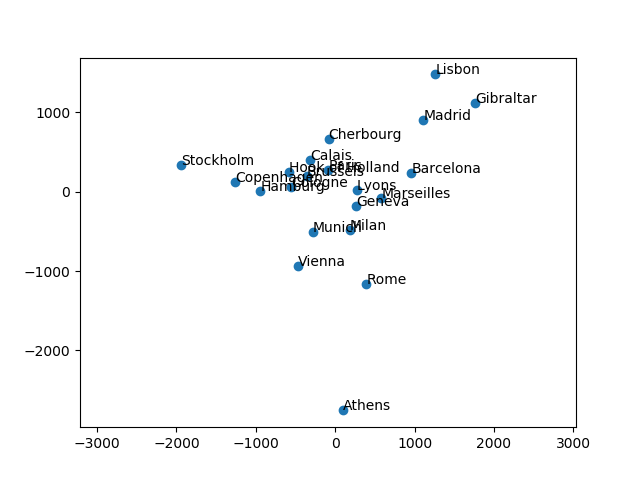

Athens [  102.05254793 -2755.37116651]
Barcelona [959.91319153 239.88255536]
Brussels [-356.17982951  203.16415899]
Calais [-318.97520623  397.34621934]
Cherbourg [-83.52183621 667.35002001]
Cologne [-559.12173871   60.64183815]
Copenhagen [-1264.49734942   126.582405  ]
Geneva [ 260.65299907 -174.40000319]
Gibraltar [1758.85739029 1120.34183111]
Hamburg [-942.38238955    5.89225373]
Hook of Holland [-579.10389655  245.42914378]
Lisbon [1262.45010062 1478.76980571]
Lyons [273.65300893  17.04006947]
Madrid [1109.02999048  908.0346568 ]
Marseilles [578.87988928 -76.75732457]
Milan [ 186.45742414 -487.1511194 ]
Munich [-282.31620997 -511.15070531]
Paris [-87.18734602 280.27942035]
Rome [  392.00392268 -1157.24742221]
Stockholm [-1940.23669496   341.46420107]
Vienna [-470.42796783 -930.14083767]


(-2125.1980524474957,
 1943.818747774205,
 -2967.0871436896136,
 1690.4857828891277)

In [81]:
# Plot: apply some rotation and flip
theta = 80 * np.pi / 180.
rot = np.array([[np.cos(theta), -np.sin(theta)],
                [np.sin(theta), np.cos(theta)]])
Xr = np.dot(Xr, rot)

# flip x
Xr[:, 0] *= -1
plt.figure()
plt.scatter(Xr[:, 0], Xr[:, 1])
for i in range(len(city)):
    plt.text(Xr[i, 0], Xr[i, 1], city[i])
    print(city[i], Xr[i,:])
plt.axis('equal')

### Resources <a id='linkResources'></a>
- Mehta et al., 2017. A high-bias, low-variance introduction to Machine Learning for physicists. https://arxiv.org/abs/1803.08823
- Cox and Cox, 2001. MDS textbook, see Ch2, Ch3, Ch4
- Friedman et al., 2009. The Elements of Statistical Learning. (see 18.5.2)
- https://stats.stackexchange.com/questions/14002/whats-the-difference-between-principal-component-analysis-and-multidimensional
- https://papers.nips.cc/paper/1873-on-a-connection-between-kernel-pca-and-metric-multidimensional-scaling.pdf